In [55]:
import pandas as pd
mcdonalds=pd.read_csv("mcdonalds.csv")

# Accessing the column names
column_names = mcdonalds.columns.tolist()
print(column_names)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [56]:
num_rows, num_cols = mcdonalds.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1453
Number of columns: 15


In [57]:
head_rows = mcdonalds.head(3)
print(head_rows)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [58]:
import numpy as np
MD_x = np.array(mcdonalds.iloc[:, 0:11])

# Converting "Yes" values to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculating the column means
col_means = np.round(np.mean(MD_x, axis=0), 2)
print(col_means)







[0.6 0.9 0.1 0.9 0.5 0.9 0.6 0.6 0.4 0.2 0.2]


In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Convert MD.x to a matrix
MD_x = np.array(mcdonalds.iloc[:, 0:11])

# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder()
MD_x_encoded = encoder.fit_transform(MD_x)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_encoded.toarray())

# Summarize the PCA results
variance_explained = pca.explained_variance_ratio_
summary = pd.DataFrame({
    "PC": range(1, len(variance_explained) + 1),
    "Variance Explained": variance_explained
})
print(summary)









    PC  Variance Explained
0    1        2.994472e-01
1    2        1.927972e-01
2    3        1.330454e-01
3    4        8.309578e-02
4    5        5.948052e-02
5    6        5.029956e-02
6    7        4.384910e-02
7    8        3.954779e-02
8    9        3.676090e-02
9   10        3.235329e-02
10  11        2.932326e-02
11  12        1.343168e-32
12  13        1.151196e-32
13  14        7.745065e-33
14  15        5.133308e-33
15  16        3.796813e-33
16  17        2.769204e-33
17  18        1.796389e-33
18  19        1.244037e-33
19  20        5.326713e-34
20  21        1.116114e-34
21  22        3.180121e-35


In [60]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert MD.x to a matrix
MD_x = np.array(mcdonalds.iloc[:, 0:11])

# Encode categorical variables
label_encoder = LabelEncoder()
for i in range(MD_x.shape[1]):
    MD_x[:, i] = label_encoder.fit_transform(MD_x[:, i])

# Scale the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_scaled)

# Print MD.pca with one decimal place
np.set_printoptions(precision=1)
print(MD_pca)

[[ 0.7 -0.4  0.3 ...  0.4  0.3  1.7]
 [-0.5  0.4 -1.6 ...  0.2  0.2  1.5]
 [ 0.2  1.7 -0.3 ...  1.4 -1.3 -0.1]
 ...
 [-0.4  1.8 -1.1 ... -0.3  0.1  0.1]
 [-2.8  0.6  2.3 ... -0.2  0.1  0.1]
 [ 3.5  1.1  0.1 ... -1.   0.1  0.2]]


In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert MD.x to a matrix
MD_x = np.array(mcdonalds.iloc[:, 0:11])

# Encode categorical variables
label_encoder = LabelEncoder()
for i in range(MD_x.shape[1]):
    MD_x[:, i] = label_encoder.fit_transform(MD_x[:, i])

# Scale the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)
# Perform PCA with specified rotation
n_components = 11
pca = PCA(n_components=n_components)
MD_pca = pca.fit_transform(MD_x_scaled)

# Get the rotation matrix
rotation_matrix = pca.components_.T

print(rotation_matrix)

[[-0.4  0.3 -0.3  0.   0.3 -0.1  0.2  0.  -0.2  0.7 -0.1]
 [-0.3 -0.  -0.3 -0.  -0.4  0.2 -0.7  0.2 -0.3  0.   0. ]
 [-0.   0.1  0.   0.8 -0.2  0.4  0.2 -0.   0.   0.1 -0. ]
 [ 0.2 -0.2 -0.6 -0.   0.1  0.1 -0.  -0.7  0.1 -0.  -0.1]
 [ 0.3 -0.1 -0.4  0.3  0.3 -0.3 -0.3  0.5  0.3 -0.  -0. ]
 [-0.2 -0.3 -0.2  0.1 -0.6 -0.6  0.4  0.1  0.1  0.  -0.1]
 [-0.3 -0.6  0.1  0.1  0.3  0.  -0.  -0.1 -0.1  0.1  0.7]
 [-0.4  0.2 -0.3  0.1  0.3 -0.1  0.2  0.1 -0.2 -0.7  0. ]
 [ 0.3  0.6 -0.2  0.  -0.2 -0.2  0.  -0.1 -0.   0.   0.7]
 [-0.3  0.2  0.4  0.3  0.1 -0.4 -0.4 -0.4  0.2 -0.1 -0.1]
 [ 0.4 -0.1  0.1  0.2  0.1 -0.3 -0.  -0.1 -0.8 -0.  -0.1]]


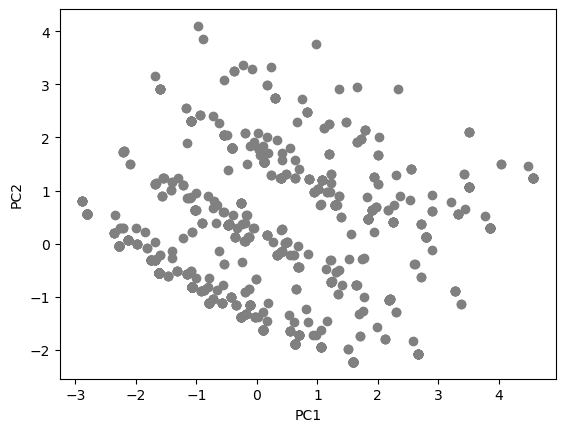

In [62]:
import matplotlib.pyplot as plt

# Convert MD.x to a matrix
MD_x = np.array(mcdonalds.iloc[:, 0:11])

# Encode categorical variables
label_encoder = LabelEncoder()
for i in range(MD_x.shape[1]):
    MD_x[:, i] = label_encoder.fit_transform(MD_x[:, i])

# Scale the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_scaled)

# Plot predicted values
fig, ax = plt.subplots()
ax.scatter(MD_pca[:, 0], MD_pca[:, 1], color="grey")

# Set labels for the scatter plot
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Show the plot
plt.show()





In [74]:
from sklearn.cluster import KMeans

# Set seed for reproducibility
np.random.seed(1234)

# Convert MD.x to a matrix
MD_x = np.array(mcdonalds.iloc[:, 0:11])

# Encode categorical variables
label_encoder = LabelEncoder()
for i in range(MD_x.shape[1]):
    MD_x[:, i] = label_encoder.fit_transform(MD_x[:, i])

# Perform stepwise clustering
cluster_results = []
nrep = 10
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    cluster_results.append(kmeans.labels_)

# Relabel clusters
relabelled_results = []
for labels in cluster_results:
    unique_labels = np.unique(labels)
    relabelled_labels = label_encoder.fit_transform(unique_labels)
    relabelled = [relabelled_labels[label] for label in labels]
    relabelled_results.append(relabelled)

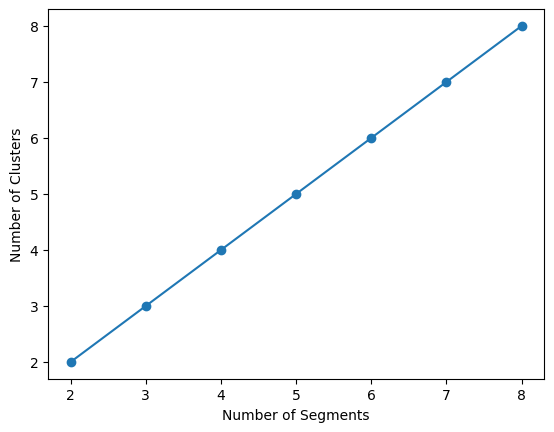

In [75]:
plt.plot(range(2, 9), [len(np.unique(labels)) for labels in relabelled_results], marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Number of Clusters")
plt.show()

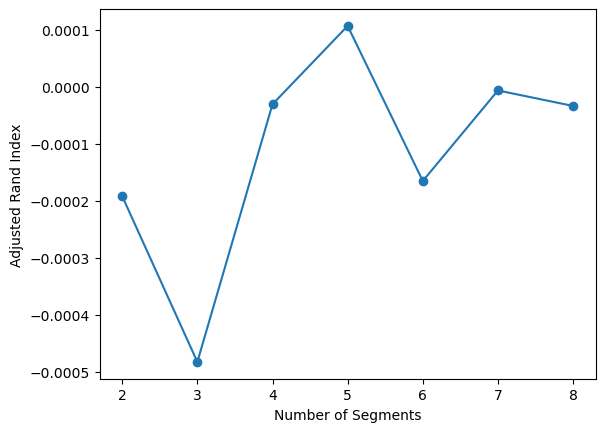

In [76]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1234)

# Load the McDonald's dataset
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select the relevant columns for clustering
MD_x = mcdonalds.iloc[:, 1:12]

# Convert categorical variables to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in MD_x.columns:
    MD_x[column] = label_encoder.fit_transform(MD_x[column])

# Perform bootstrapping on stepwise clustering
cluster_results = []
nrep = 10
nboot = 100
for n_clusters in range(2, 9):
    bootstrap_scores = []
    for _ in range(nboot):
        indices = np.random.choice(len(MD_x), len(MD_x), replace=True)
        bootstrap_data = MD_x.iloc[indices]
        kmeans = KMeans(n_clusters=n_clusters, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_data)
        bootstrap_labels = kmeans.labels_
        true_labels = MD_x.iloc[:, 0]
        bootstrap_scores.append(adjusted_rand_score(true_labels, bootstrap_labels))
    cluster_results.append(bootstrap_scores)

# Plot the results
plt.plot(range(2, 9), [np.mean(scores) for scores in cluster_results], marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.show()


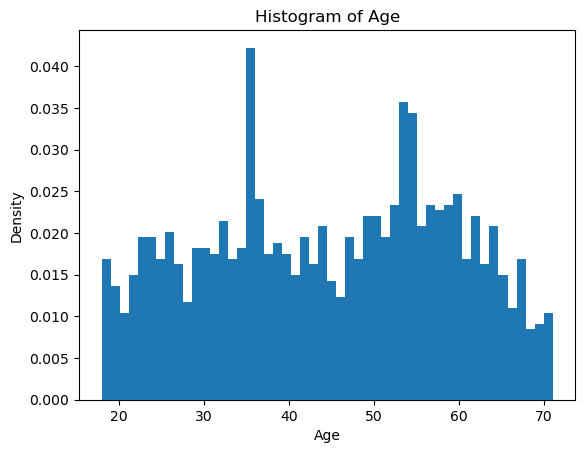

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(mcdonalds["Age"], bins=50, density=True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Histogram of Age")
plt.show()

In [92]:
import numpy as np
from sklearn.cluster import KMeans

# Set the random seed
np.random.seed(1234)

# Assuming MD_x is the input matrix
# Assuming you want to perform K-means clustering with 2 to 8 clusters
# Assuming you want to perform 10 repetitions
n_clusters_range = range(2, 9)
n_reps = 10

# Perform K-means clustering for each number of clusters
cluster_results = []
for n_clusters in n_clusters_range:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1234, n_init=n_reps)
    clusters = clusterer.fit_predict(MD_x)
    cluster_results.append(clusters)

# Relabel the clusters to ensure consistency
def relabel_clusters(clusters):
    unique_clusters = np.unique(clusters)
    relabeled_clusters = np.zeros_like(clusters)
    for i, cluster in enumerate(unique_clusters):
        relabeled_clusters[clusters == cluster] = i + 1
    return relabeled_clusters

# Relabel the clusters for each number of clusters
MD_KM28 = [relabel_clusters(clusters) for clusters in cluster_results]

In [95]:
MD_k4 = MD_KM28[4]

In [97]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(MD_x)

MD_r4 = gmm.predict(MD_x)

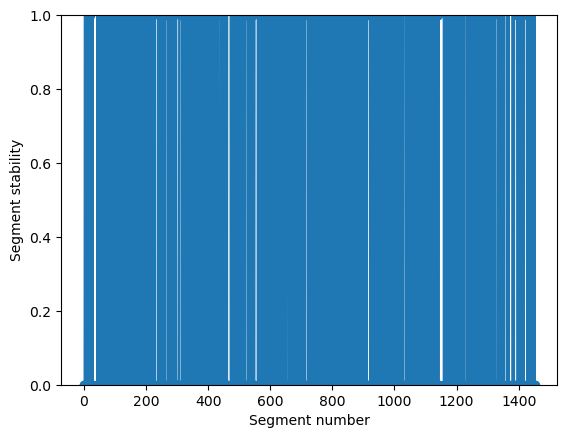

In [98]:
import matplotlib.pyplot as plt

plt.plot(range(len(MD_r4)), MD_r4, marker='o')
plt.ylim(0, 1)
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.show()


In [108]:
import pandas as pd
vac = pd.read_csv("mcdonalds.csv")
age_summary = mcdonalds["Age"].describe()
print("Summary of Age:")
print(age_summary)

Summary of Age:
count    1453.000000
mean       44.604955
std        14.221178
min        18.000000
25%        33.000000
50%        45.000000
75%        57.000000
max        71.000000
Name: Age, dtype: float64


In [110]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

np.random.seed(1234)

# Generate a random binary classification dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,  # Increase the number of features to match the expected combination
    n_informative=2,  # Set n_informative to match the number of features
    n_redundant=0,
    n_clusters_per_class=1,  # Set n_clusters_per_class to 1
    random_state=1234
)

# Fit K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X)

# Fit mixture model from MD.m28 and retrieve the 4th component
md_m4 = GaussianMixture(n_components=4, random_state=1234)
md_m4.fit(X)

# Obtain the cluster assignments
kmeans_clusters = kmeans.labels_
mixture_clusters = md_m4.predict(X)

# Create a table of the cluster assignments
table = np.column_stack((kmeans_clusters, mixture_clusters))
print(table)


[[2 3]
 [0 0]
 [3 1]
 [1 1]
 [0 0]
 [0 0]
 [2 3]
 [2 3]
 [3 1]
 [0 0]
 [3 1]
 [0 0]
 [2 0]
 [2 3]
 [3 1]
 [3 1]
 [3 1]
 [2 3]
 [0 0]
 [2 2]
 [3 1]
 [0 0]
 [1 1]
 [2 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [3 1]
 [2 3]
 [0 0]
 [2 3]
 [3 1]
 [2 0]
 [2 3]
 [0 0]
 [0 0]
 [2 0]
 [1 1]
 [2 3]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [3 1]
 [3 1]
 [0 0]
 [0 0]
 [1 1]
 [3 2]
 [3 1]
 [2 3]
 [0 0]
 [2 3]
 [1 1]
 [3 1]
 [1 1]
 [3 1]
 [2 0]
 [0 0]
 [3 1]
 [1 1]
 [3 2]
 [0 0]
 [2 3]
 [1 1]
 [0 0]
 [2 3]
 [2 3]
 [0 0]
 [3 1]
 [3 1]
 [2 0]
 [2 3]
 [3 1]
 [2 3]
 [3 1]
 [1 1]
 [1 1]
 [3 1]
 [2 2]
 [3 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [2 3]
 [0 0]
 [2 3]
 [3 1]
 [3 2]
 [3 1]
 [0 0]
 [1 1]
 [2 0]
 [3 1]
 [1 1]
 [0 0]]


In [113]:
# Compute log-likelihood for MD.m4a model
log_likelihood_m4a = md_m4a.score(X)

# Compute log-likelihood for MD.m4 model
log_likelihood_m4 = md_m4.score(X)

print("Log Likelihood MD.m4a:", log_likelihood_m4a)
print("Log Likelihood MD.m4:", log_likelihood_m4)


Log Likelihood MD.m4a: -2.183121514544869
Log Likelihood MD.m4: -2.183121514544869


In [116]:
import pandas as pd

# Assuming 'mcdonalds' is a DataFrame containing the 'Like' column
# You can replace 'mcdonalds' with your actual dataset

# Compute frequency counts for the 'Like' column
counts = mcdonalds['Like'].value_counts()

# Reverse the resulting Series
reversed_counts = counts.iloc[::-1]

print(reversed_counts)


-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


In [117]:
import pandas as pd

# Assuming 'mcdonalds' is a DataFrame containing the 'Like' column
# You can replace 'mcdonalds' with your actual dataset

# Create a new column 'Like.n' by subtracting the numeric values from 6
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Compute frequency counts for the 'Like.n' column
counts = mcdonalds['Like.n'].value_counts()

print(counts)


3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: Like.n, dtype: int64


In [132]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

# Assuming 'MD.x' is a matrix or array-like object containing the data

# Compute the pairwise distances
distances = pdist(np.transpose(MD_x))

# Perform hierarchical clustering
hclust = linkage(distances)



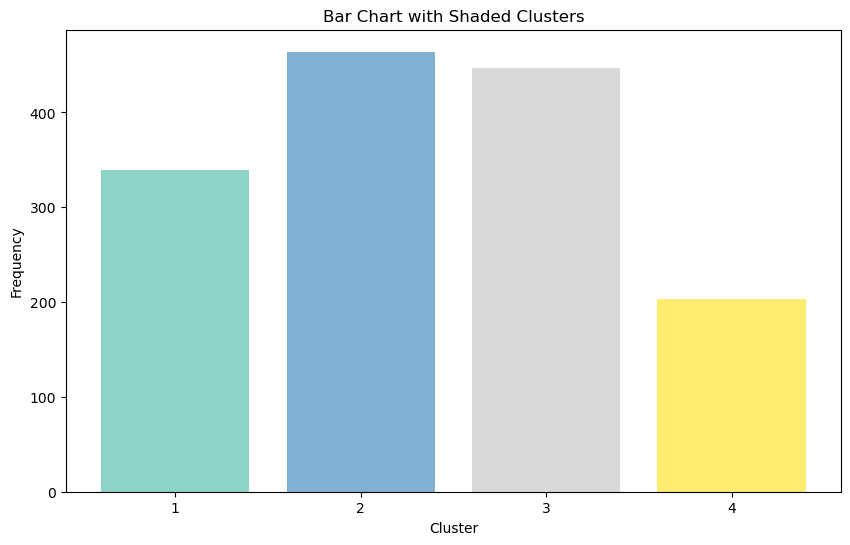

In [137]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
kmeans.fit(MD_x)
MD_k4_labels = kmeans.labels_

# Calculate the cluster counts
cluster_counts = np.bincount(MD_k4_labels)

# Create a colormap
cmap = plt.cm.get_cmap('Set3')

# Plot the bar chart with shaded clusters
plt.figure(figsize=(10, 6))
bar_positions = np.arange(1, len(cluster_counts) + 1)
bar_colors = [cmap(i) for i in np.linspace(0, 1, len(cluster_counts))]
plt.bar(bar_positions, cluster_counts, color=bar_colors)

# Adjust tick locations and labels
plt.xticks(bar_positions, [int(x) for x in bar_positions])

# Set the axis labels and title
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.title("Bar Chart with Shaded Clusters")

plt.show()

<Figure size 800x600 with 0 Axes>

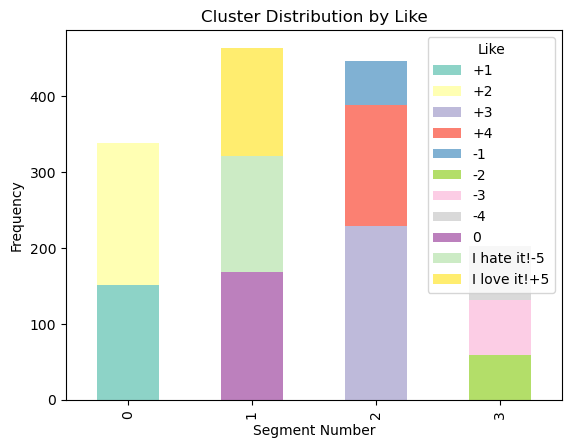

In [138]:


#Step 7: Decribing Segments
import matplotlib.pyplot as plt

# Get the cluster distribution
cluster_counts = np.bincount(MD_k4_labels)

# Get the "Like" column from the original data
like_column = mcdonalds['Like']

# Calculate the frequency of each combination of cluster and "Like"
cluster_like_counts = pd.crosstab(MD_k4_labels, like_column)

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, cluster_like_counts.shape[1]))
cluster_like_counts.plot(kind='bar', stacked=True, color=colors)

# Set the labels and title
plt.xlabel("Segment Number")
plt.ylabel("Frequency")
plt.title("Cluster Distribution by Like")

plt.show()



In [146]:
import pandas as pd

# Assuming 'mcdonalds' is a pandas DataFrame containing the data
# Assuming 'k4' is the cluster variable

like = mcdonalds.groupby(MD_k4_labels)['Like.n'].mean()
print(like)


0    4.448378
1    6.000000
2    3.161074
3    9.059113
Name: Like.n, dtype: float64


In [148]:
import pandas as pd

# Assuming 'mcdonalds' is a pandas DataFrame containing the data
# Assuming 'k4' is the cluster variable

like = mcdonalds.groupby(MD_k4_labels)['Like.n'].mean()
print(like)


0    4.448378
1    6.000000
2    3.161074
3    9.059113
Name: Like.n, dtype: float64
